<a href="https://colab.research.google.com/github/jovinyt/wti_crudeoil_prediction/blob/main/WTI_Crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *5 Year range of WTI crude oil data (01 / 12 / 2015 - 01 / 12 / 2020)*


dataset link (google drive) : https://drive.google.com/file/d/1a_wpeyeCOl8R3l8J672O7ngaTEWkBZrG/view?usp=sharing

dataset link (one drive) : https://cloudmails-my.sharepoint.com/:x:/g/personal/tp058811_mail_apu_edu_my/EQ859cjPjMhHiF1RFbt6pu0BVJJAeS2LMtnfmesiAlYdMA?e=d3tlCK



#Introduction
West Trade Intermediate (WTI) crude oil index (US oil) is the one of the main benchmarks of oil pricing, along with Dubai Crude and Brent oil (UK oil). WTI crude oil considered as high quality and easier refine crude oil and it also known as the underlying commodity of the New York Mercantile Exchange's (NYMEX)(Chen, 2020). From the previous report, the WTI crude oil presented the highly correlation with the oil & gas energy related stock, which meaning the fluctuation and volatility will impact the oil & gas energy stock. Hence, the LSTM model development for predicting the price of WTI crude oil will be implemented in this research in order to provide the authorities and investors have a better direction and prepare any uncertainty impact to the WTI crude oil price from the economy. 


#Data collection
For the data collection, the 5-years of WTI crude oil data which between 01/12/2015 - 01/12/2020 are being used for the implementation on predicting the future price with Long Short Memory Model (LSTM). The dataset was collected from the source of Yahoo Finance and downloaded for this study to examine and predict the future price of WTI crude oil. 




There are 1273 observation and 7 variables presented from the data and the information of the daily transaction. Additionally, the variable, Daily Return was created as a new variable with provide the information of daily return during daily trading, so a total of 8 variables in the data will be showed.

The variables of the dataset and the description are being discussed in the table below.





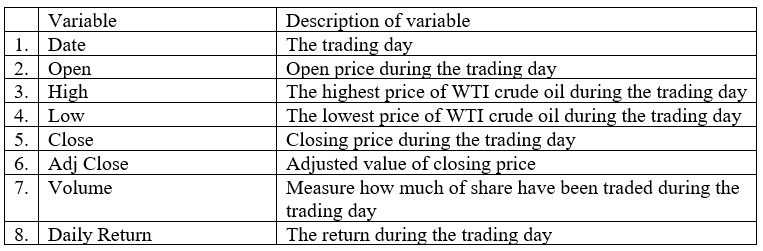

The pandas library was imported because it is popular Python-based data analysis toolkit for data analysis (rajput, 2021).

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/12/2015,41.730000,42.230000,41.169998,41.849998,41.849998,415537
1,02/12/2015,41.689999,41.970001,39.840000,39.939999,39.939999,545289
2,03/12/2015,40.150002,41.779999,40.070000,41.080002,41.080002,496884
3,04/12/2015,41.310001,42.000000,39.599998,39.970001,39.970001,510758
4,07/12/2015,40.099998,40.150002,37.500000,37.650002,37.650002,635413


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1269,23/11/2020,42.459999,43.360001,42.290001,43.060001,43.060001,300717
1270,24/11/2020,42.840000,45.200001,42.820000,44.910000,44.910000,418527
1271,25/11/2020,44.820000,46.259998,44.730000,45.709999,45.709999,417182
1272,30/11/2020,45.340000,45.799999,44.419998,45.340000,45.340000,370755
1273,01/12/2020,45.080002,45.700001,44.119999,44.549999,44.549999,314919


dataset.shape displayed with the result (1274, 7) which meaning that the dataset have 1274 rows and 7 columns. 

In [ ]:
dataset.shape 

(1274, 7)

##Variable Creation
Furthermore, the variable creation on the daily return was created to understand and visualised how the return on the daily basis. This variable could provide a better visualise for the researchers and know whether the return are better or worsen. The additional variable creation was showed in the table below. 

dataset.shape showed the result (1274, 8) after adding the Daily Return variables.

In [ ]:
for x in dataset:
    dataset['Daily Return'] = dataset['Adj Close'].pct_change()
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,01/12/2015,41.730000,42.230000,41.169998,41.849998,41.849998,415537,NaN
1,02/12/2015,41.689999,41.970001,39.840000,39.939999,39.939999,545289,-0.045639
2,03/12/2015,40.150002,41.779999,40.070000,41.080002,41.080002,496884,0.028543
3,04/12/2015,41.310001,42.000000,39.599998,39.970001,39.970001,510758,-0.027020
4,07/12/2015,40.099998,40.150002,37.500000,37.650002,37.650002,635413,-0.058044


In [ ]:
dataset.shape #1274 rows and 8 column

(1274, 8)

#Exploratory Data Analysis
*Chart for 5 years daily price for WTI crude oil*

The NumPy library with powerful function and provide the common mathematical function (Malik, 2019) and matplot library is commonly used to the visualisation to plot, create and customise the interative graph for the exploratory data analysis (Matplotlib, 2021). The reason behind carry out the exploratory data analysis is to discover the pattern, spot the anomalies, check the assumption with the help of statistics summary and the representation of graphics(Patil, 2018). Exploratory data analysis considered as a good practice for the researchers to understand the data and gather all the insight. 



In [ ]:
import numpy
import matplotlib.pyplot as plt

The graph below presented the 5 years range of daily price for WTI crude oil price, it reveal the volatility and the fluctuation of the crude oil price during the time frame. From the graph, there was a period that nearly day 1100 in the 5 years timeframe, the price of WTI crude oil went into negative territory. From the report of Wallance (2020), the price of WTI crude oil went to negative for the first time in the history during 20 April 2020, due to the lockdown of Covid-19 pandemic in the world drove a perfect storm of weak demand and exhaustion of storage capacity. Additionally, the volume of each trading day for the WTI crude oil also demonstrated at below. 

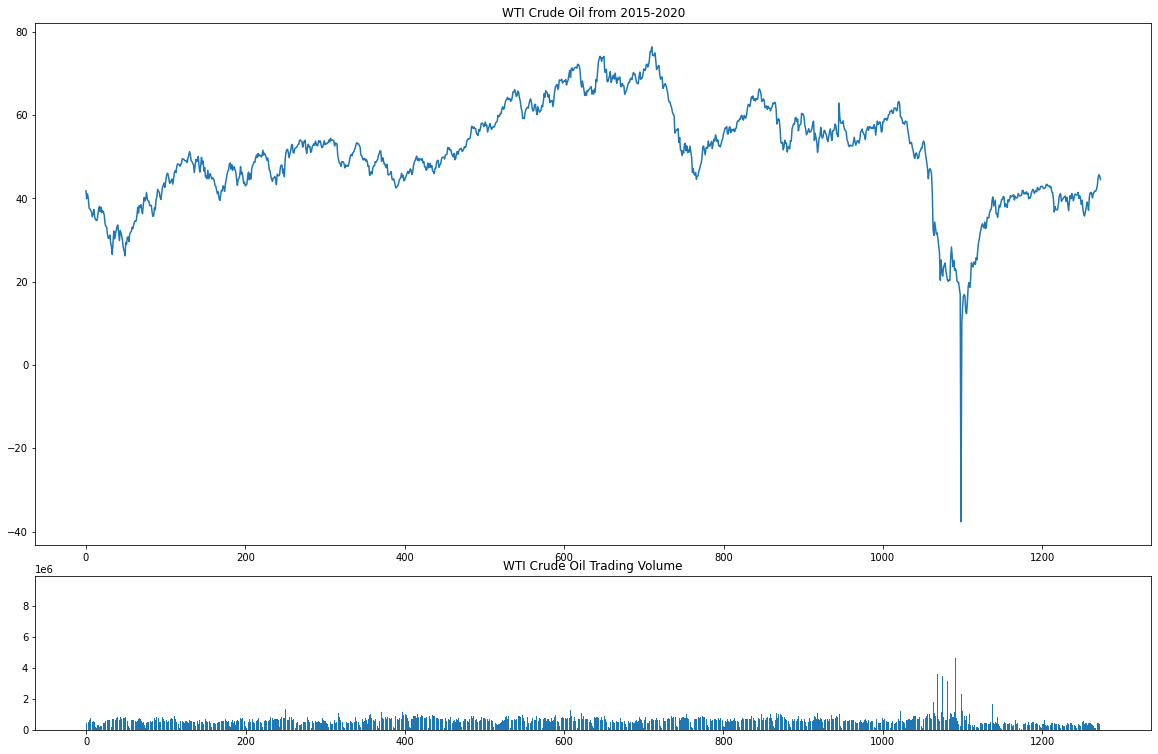

In [ ]:
#show the WTI crude oil price and the volume being traded in each day within the 5 years

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(dataset.index, dataset["Close"])
plt.title('WTI Crude Oil from 2015-2020')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(dataset.index, dataset['Volume'])
plt.title('WTI Crude Oil Trading Volume')

plt.gcf().set_size_inches(20,13)

After done the baseline analysis on the WTI crude oil, the researcher use pandas to retrieve the daily changes in return of the WTI crude oil in order to have more closer and deeper visualise on this commodity. 

Text(0.5, 1.0, 'WTI Crude Oil')

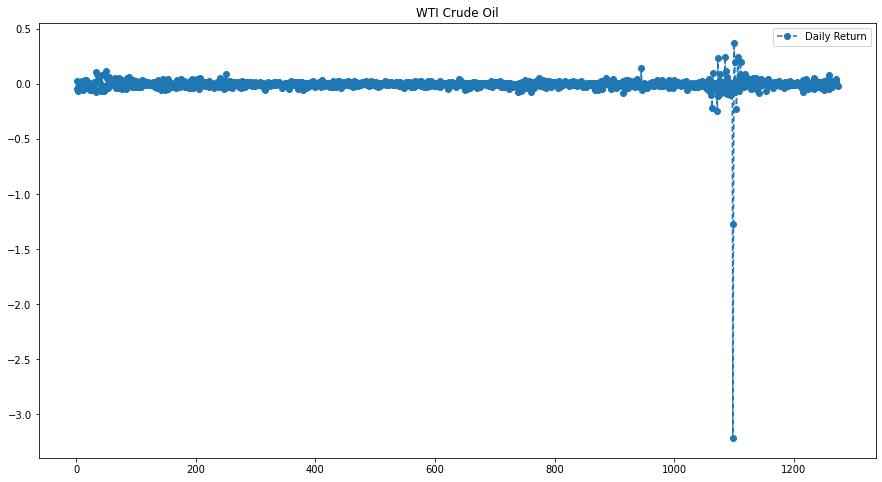

In [ ]:
fig, axes = plt.subplots (nrows=1, ncols=0) #(Sayah, 2020)
fig.set_figheight(8)
fig.set_figwidth(15)
dataset['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('WTI Crude Oil')

#Data Pre-processing
For the data pre-processing, it created a new dataframe "df1" for only included the 'close', which is the closing price as it will be used for the stock prediction.

As the LSTM Model sensitive to the scale of data, so MinMaxScaler will be applied for the data transformation for normalisation purpose. It used the scaler to normalise the data and the MinMaxScaller scales the data in the region between 0 and 1. The "df1" reshape into the shape [data_size, num_features] and convert the dataframe (df1) into the numpy array. 

From df1.shape, it used to get the number of rows to train the model on. It indicate the df1 have 1274 rows and only 1 characteristics in the dataframe. 













In [ ]:
df1 = dataset.reset_index()['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape (-1, 1))
df1

array([[0.6969484 ],
       [0.6801999 ],
       [0.69019642],
       ...,
       [0.73079618],
       [0.72755171],
       [0.72062431]])

In [ ]:
df1.shape

(1274, 1)

After converting the dataframe with only "close" column, the next step would be data partition. To complete the data partition, it necessary to split the data into two, which are train set and test set. In this study, the dataset will split with 70% for training set for the model development and the remaining 30% will be test set where carry out the unbiased evaluation for the final model fit on the train dataset. The test dataset known as a golden standard for evaluate the model and its only used once the model is completely trained (Shah, 2017). 


In [ ]:
#split the data into 70% train set and 30% test set (Brownlee, 2019)
train_size = int(len(df1) * 0.7) 
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:], df1[train_size: len(df1),:1]

In [ ]:
train_size, test_size

(891, 383)

In [ ]:
len(train_data),len(test_data) #rowcount
train_data.shape, test_data.shape 

((891, 1), (383, 1))

In [ ]:
train_data

array([[0.6969484 ],
       [0.6801999 ],
       [0.69019642],
       [0.68046298],
       [0.66011925],
       [0.65889158],
       [0.6558225 ],
       [0.65231494],
       [0.64231846],
       [0.64836898],
       [0.65748856],
       [0.64144158],
       [0.63644334],
       [0.63451419],
       [0.63460189],
       [0.64687826],
       [0.65880391],
       [0.6640652 ],
       [0.65275341],
       [0.66204838],
       [0.65091192],
       [0.65477024],
       [0.65231494],
       [0.64538757],
       [0.62784987],
       [0.62171166],
       [0.62074709],
       [0.6054016 ],
       [0.59689582],
       [0.59724656],
       [0.60356015],
       [0.58795158],
       [0.57953347],
       [0.56278496],
       [0.58891616],
       [0.61224129],
       [0.59601892],
       [0.60575236],
       [0.61320587],
       [0.62127323],
       [0.62478075],
       [0.60724306],
       [0.59198524],
       [0.61303049],
       [0.60811993],
       [0.60084178],
       [0.59031918],
       [0.574

In [ ]:
import tensorflow as tf
tf.__version__


'2.4.0'

#Data Preparation
As the Long Short Term Memory (LSTM) model will learn from a function that maps a sequence of past observation as input to an output observation. Thus, the LSTM require the sequence of observation to transformed into multiple examples. To accomplish the requirement, it need the researchers to divided the sequence into multiple input/output pattern called sample. The timestep is an essential for the LSTM which defined as tick of time, which means how long in time each of the sample is for the time series forecasting. In the research, it set the network to have 60 days and trying to predict the WTI crude oil price in day 61. Hence, 60 timesteps are utilised as input (dataX) and one time step used as output (dataY) for the one-step prediction. 

The new_dataset() function was implemented this practice with split a given univariate sequence into several samples where each of the sample contain a specified number of timestep and single timestep found in the output. After complete on separate the timesteps into input (dataX) and output(dataY), the dataX split into x_train and x_test while dataY split into y_train and y_test. 









In [ ]:
#split the dataset into dataX and dataY
#convert and return them into numpy array. 
def new_dataset (data, timestep = 1):
    dataX, dataY = [], []
    for i in range (len(data)-timestep-1):
      days = data [i:(i+timestep), 0]
      dataX.append(days)
      dataY.append(data[i + timestep, 0])
    return numpy.array(dataX), numpy.array(dataY)
  


In [ ]:
timestep = 60
x_train, y_train = new_dataset(train_data, timestep )
x_test, y_test = new_dataset(test_data, timestep)


In [ ]:
print(x_train) #which show the 60 features

[[0.6969484  0.6801999  0.69019642 ... 0.61189056 0.61995789 0.61741492]
 [0.6801999  0.69019642 0.68046298 ... 0.61995789 0.61741492 0.62592071]
 [0.69019642 0.68046298 0.66011925 ... 0.61741492 0.62592071 0.63162048]
 ...
 [0.85092947 0.84996489 0.85733072 ... 0.80261311 0.80138543 0.82672745]
 [0.84996489 0.85733072 0.87004557 ... 0.80138543 0.82672745 0.83356714]
 [0.85733072 0.87004557 0.87872675 ... 0.82672745 0.83356714 0.83768852]]


In [ ]:
print(y_train.shape, x_train.shape)
print(y_test.shape, x_test.shape)

(830,) (830, 60)
(322,) (322, 60)


#LSTM requirement

Additionally, the LSTM network was expected the input component of training data to shape with the three dimension [sample, timestep, features]. Therefore, the x_train and x_test need to reshape it to have an extra dimension for the one feature. 

On the row of 24, it indicated that the x_train presented with 830 samples, 60 timesteps and 1 features, while x_test have 322 samples,60 timestep and 1 features. 


In [ ]:
#the requirement of LSTM is to reshape the input to [samples, timesteps, features] 
x_train = x_train.reshape (x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] ,1)

In [ ]:
print(y_train.shape)
print(x_train.shape)
print("----------------")
print(y_test.shape)
print(x_test.shape)


(830,)
(830, 60, 1)
----------------
(322,)
(322, 60, 1)


#Model Implementation


For the LSTM model development in the research, it has prepare two stacked LSTM models with 50 neurons, 3 hidden layer and 1 output layer. However, one of the model will be adding an additional dropout hyperparameter for each of the hidden layer in the model in term of explore the different between the both model. 

Before develop the LSTM, it needs to make a few import from Keras like Sequential for loading the neural network, LSTM function as add the layer of LSTM, Dense to add a densely connected the neural network layer and Dropout used for the second model to prevent overfitting problem with dropout layers.


The return_sequence was set to true where the output becomes 3D array instead of 2D array. With the 3D array, it provide an additional dimension for the LSTM model between representing the number of timesteps (Verma, 2019). 





In [ ]:
from tensorflow.keras.models import Sequential 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

import tensorflow as tf
tf.__version__ #check tf version



'2.4.0'

###Model without dropout hyperparameter

The layer of LSTM added with the following condition, 50 unit of neurons added into each hidden layer, return_sequence = True was set that are necessary for stacking LSTM where the output become 3 dimensional sequence input and the input_shape is the shape of the training dataset which is 60 timesteps and 1 features. With following the LSTM, the dense layer was added as an output of one unit. To compile the model, Adam optimizer and mean_squared_error was set the loss. After set all the setting, the model will fit and run for 100 epochs with a batch size of 32. The epoch are the number of times that learning algorithms passed thorugh the entire training dataset and batch size is another hyperparameter that defines the number of samples to work through (Brownlee, 2019). x_test and y_test used as the validation_data in the model.fit to evaluate the loss and any model metrics at the end of each epoch (Keras, 2021).

In [ ]:

model1 = Sequential()
model1.add(LSTM(50, return_sequences= True, input_shape = (60, 1))) #number of timesteps and features
model1.add(LSTM(50, return_sequences= True)) #number of timesteps and features
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mean_squared_error')

model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_without = model1.fit(x_train,y_train,epochs= 100,batch_size=32, validation_data = (x_test, y_test))

Epoch 1/100
26/26 [==============================] - 2s 93ms/step - loss: 0.0017 - val_loss: 0.0067
Epoch 2/100
26/26 [==============================] - 2s 91ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 3/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 4/100
26/26 [==============================] - 2s 93ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 5/100
26/26 [==============================] - 2s 92ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 6/100
26/26 [==============================] - 2s 93ms/step - loss: 9.0987e-04 - val_loss: 0.0037
Epoch 7/100
26/26 [==============================] - 2s 94ms/step - loss: 8.6626e-04 - val_loss: 0.0031
Epoch 8/100
26/26 [==============================] - 2s 93ms/step - loss: 8.1517e-04 - val_loss: 0.0035
Epoch 9/100
26/26 [==============================] - 2s 93ms/step - loss: 7.2966e-04 - val_loss: 0.0029
Epoch 10/100
26/26 [==============================] - 2s 95ms/step - loss: 7.1486e-0

After run all the steps, the matplotlib was used to visualise the validation loss and loss while the number of epochs increased during the learning algorithms. From the graph of training and validation loss, it can be observed that the validation loss and training loss decreasing when the epochs increased. However, if need to get a better result and good fit for the model, the epochs should be increased along with the increasing of training time. 



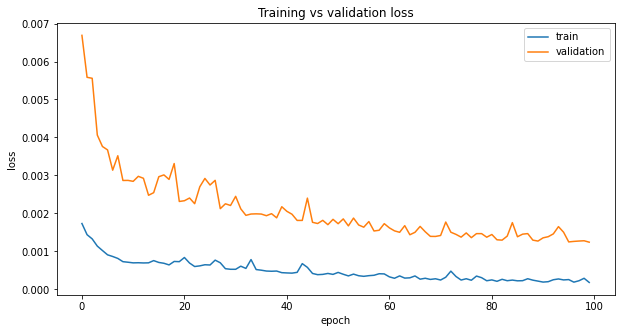

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

pyplot.plot(history_without.history['loss'])
pyplot.plot(history_without.history['val_loss'])
pyplot.title('Training vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

###Model with Dropout hyperparameter and Early Stopping Function

However, the dropout hyperparameter and predictive early stopping function utilised in the model. The dropout function also being applied for the development of LSTM model. The dropout known as a technique that could avoid the overfitting occured in the LSTM model and improve the performance of the neural networks. The Dropout rate is set to 20% as a weight constraint on those hidden layers and means 1 in 5 inputs will randomly excluded from each update cycle and the  probabilities of dropping a neuron (Kingma et al., 2015). 

For the development of model2, the model was fit with same setting as model1 yet with addition of the dropout layer after each of the hidden layer. 

In [ ]:
from keras.callbacks import EarlyStopping


In [ ]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences= True, input_shape = (60, 1))) #number of timesteps and features
model2.add(Dropout(0.2))

model2.add(LSTM(50, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(50))
model2.add(Dropout(0.2))

model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mean_squared_error')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

Furthermore, early stopping function is also a form of regularization that could avoid overfitting during the training process and a pproach for speeding up the model training and hyperparameter optimization (Binford, 2020). To initialise the early stopping function, the keras module contain a built-in callbacks for the Early Stopping, so import the EarlyStopping callback

The Early Stopping was set to monitor the validation loss (monitor = val_loss) while it reaches the minimum (mode = 'min') when there are 10 epochs with no improvement on validation loss as (patience = 10), then the model will triggered and stop the training earlier.  

Besides, to discover the training epoch on which training was stopped, the “verbose” argument set to 1. Once stopped, the callback will print the epoch number.

In [ ]:
earlyStop=EarlyStopping(monitor="val_loss",verbose= 1,mode='min',patience= 10) 
history_with = model2.fit(x_train,y_train,epochs= 100,batch_size=32, validation_data = (x_test, y_test), callbacks = [earlyStop])


Epoch 1/100
26/26 [==============================] - 8s 137ms/step - loss: 0.2591 - val_loss: 0.0225
Epoch 2/100
26/26 [==============================] - 2s 93ms/step - loss: 0.0112 - val_loss: 0.0048
Epoch 3/100
26/26 [==============================] - 2s 93ms/step - loss: 0.0073 - val_loss: 0.0050
Epoch 4/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0076 - val_loss: 0.0052
Epoch 5/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 6/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 7/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 8/100
26/26 [==============================] - 3s 108ms/step - loss: 0.0062 - val_loss: 0.0039
Epoch 9/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 10/100
26/26 [==============================] - 2s 96ms/step - loss: 0.0054 - val_loss: 0.00

Compare with the model loss with model1, the plot of learning curves for model2 demonstrates a case of a good fit. The plot of training loss and the plot of validation loss decreases to a point of stability and has small gap with between the training loss and the validation loss. With the early stopping function, the network trained for 65 epochs instead of 100 epochs as the initial setting before the model trained.

The early stopping function give an aids on halt the training when there are no improvement on the model performance, this could decrease the unnecessary training time and prevent the overfit problem to the research.

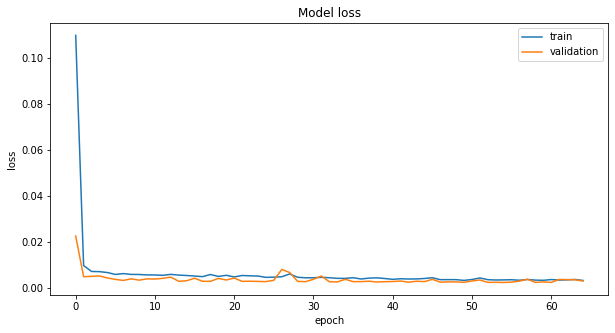

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

pyplot.plot(history_with.history['loss'])
pyplot.plot(history_with.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.0'

# Performance Evaluation
Model2 was selected for the further research such as checking the performance metrics and prediction. The prediction of x_train and x_test need to transform back to the originial form. 

In [ ]:
#for prediction and check the performance metrics

predictTrain = model2.predict(x_train) #training dataset
predictTest = model2.predict(x_test)


In [ ]:
predictTrain= scaler.inverse_transform(predictTrain)
predictTest= scaler.inverse_transform(predictTest)

After completed the inverse transformation, the data was undergo the examine of performance metrics with Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Mean Squared Error(MSE). The RMSE and MSE of train set is 54.63 and 2984.06 while test set is 44.75 and 2002.76. As the RMSE of train and test set are not much different, it is likely to have a good fit model yet if the RMSE of train  There was not much difference on compare both set. The MAE have a similar result with MSE, which is 55.19 and 44.37. 

In [ ]:
import math
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import numpy as np


RMSE_train = math.sqrt(mean_squared_error(y_train, predictTrain))
print("The RMSE for train data is " + str(RMSE_train))

RMSE_test = math.sqrt(mean_squared_error(y_test, predictTest))
print("The RMSE for test data is " + str(RMSE_test))

MSE_train = mean_squared_error(y_train, predictTrain)
print("The MSE for train data is "+ str(MSE_train))

MSE_test = mean_squared_error(y_test, predictTest)
print("The MSE for test data is " + str(MSE_test))


print('The MAE for train data is ', mean_absolute_error(y_train, predictTrain))
print('The MAE for test data is ', mean_absolute_error(y_test, predictTest))





The RMSE for train data is 55.79498456904986
The RMSE for test data is 45.77171032569334
The MSE for train data is 3113.080303060512
The MSE for test data is 2095.0494661391826
The MAE for train data is  55.19015930397171
The MAE for test data is  44.37212215820944


##Visualisation of the prediction on train and test set

After all these step, the matplotlib was used to visualised the result of the predicted stock price and the actual stock price. 

Orange colour output represent the predicted training dataset and the green colour line shoed the prediction with the test dataset

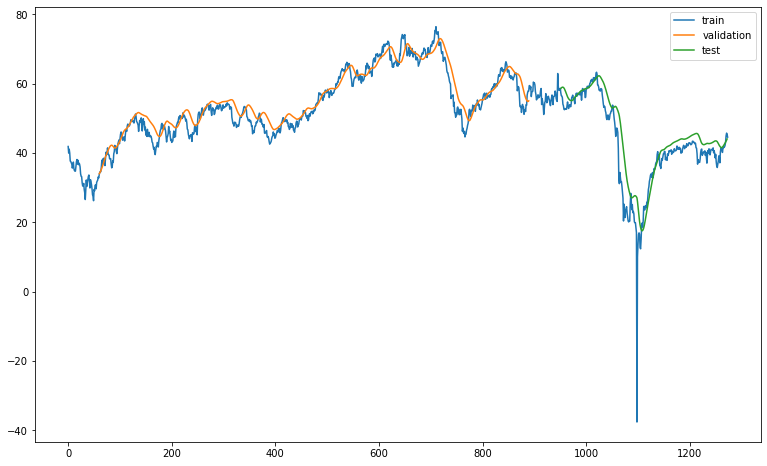

In [ ]:
l_back= 60 # number of timesteps, which set initially

#set the size of plotting figure
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(13)

plot_predictTrain = numpy.empty_like(df1) #return the array of df1 with same shape
plot_predictTrain[:, :] = np.nan
plot_predictTrain[l_back:len(predictTrain)+l_back, :] = predictTrain
# shift test predictions for plotting
plot_predictTest = numpy.empty_like(df1) 
plot_predictTest[:, :] = numpy.nan
plot_predictTest[len(predictTrain)+(l_back*2)+1:len(df1)-1, :] = predictTest
#plot the prediction and baseline
plt.plot(scaler.inverse_transform(df1))
plt.plot(plot_predictTrain)
plt.plot(plot_predictTest)
pyplot.legend(['train', 'validation','test'], loc='upper right')
plt.show()

#Predict the price of WTI crude oil index for next 100 days. 



In [ ]:
len(test_data) #383 record for test_data

383

As the timestep is 60, so the researchers taking 60 data which from  323 to 383 for the prediction (x_df) and x_df show the 60 data. After that, list() used for the x_df to create a list in temp_input.

In [ ]:
x_df =test_data[323:].reshape(1,-1)
x_df.shape

(1, 60)

In [ ]:
temp_input=list(x_df) 
temp_input=temp_input[0].tolist() #return a list of the value

###List of temp_input

In [ ]:
temp_input 


[0.6787092038447385,
 0.6523149398318598,
 0.6636267685186439,
 0.6570501290314745,
 0.6573132209175192,
 0.6566993661566394,
 0.6656436046280425,
 0.6821290563780666,
 0.6892318357930622,
 0.6904594751640005,
 0.6746755403947939,
 0.6772184813566081,
 0.680112220268668,
 0.6834443930443531,
 0.682918253116527,
 0.6859873340061673,
 0.6745001633418027,
 0.6826551963058929,
 0.669501917331554,
 0.6548579158690847,
 0.6738863436563336,
 0.6866011536916365,
 0.6802876060905119,
 0.69116096583826,
 0.6859873340061673,
 0.6757277939438884,
 0.6824798192529016,
 0.6898456554785315,
 0.6891441297288613,
 0.6884426390546019,
 0.6880042051909766,
 0.6935285560536409,
 0.6809890967647712,
 0.6863380968810023,
 0.6794106945189979,
 0.6680989009076245,
 0.6769554333148267,
 0.6578393257699349,
 0.64714131676862,
 0.6438091790683453,
 0.6527534087708957,
 0.6602069247541684,
 0.6732725327397171,
 0.6701157370170231,
 0.6556471126075449,
 0.6832690159913619,
 0.6926516883263905,
 0.6934408850648507,

##Code for predicting the price of WTI crude oil in future 100 days

In [ ]:

from numpy import array

output_lst=[]
n_steps=60 #timestep
i=0
while(i<100): #when i is less than 100 then run the loop
    
    if(len(temp_input) > 60):
        #print(temp_input)
        x_df=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_df))
        x_df=x_df.reshape(1,-1)
        x_df = x_df.reshape((1, n_steps, 1)) #reshape input to [samples, timesteps. features]
        #print(x_df)
        yhat = model2.predict(x_df, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        x_df = x_df.reshape((1, n_steps,1)) #reshape input to [samples, timesteps. features]
        yhat = model2.predict(x_df, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
    

print(output_lst)

[0.7228585]
61
1 day input [0.65231494 0.66362677 0.65705013 0.65731322 0.65669937 0.6656436
 0.68212906 0.68923184 0.69045948 0.67467554 0.67721848 0.68011222
 0.68344439 0.68291825 0.68598733 0.67450016 0.6826552  0.66950192
 0.65485792 0.67388634 0.68660115 0.68028761 0.69116097 0.68598733
 0.67572779 0.68247982 0.68984566 0.68914413 0.68844264 0.68800421
 0.69352856 0.6809891  0.6863381  0.67941069 0.6680989  0.67695543
 0.65783933 0.64714132 0.64380918 0.65275341 0.66020692 0.67327253
 0.67011574 0.65564711 0.68326902 0.69265169 0.69344089 0.69054715
 0.681866   0.6924763  0.6932655  0.69668535 0.69598386 0.69957909
 0.70755874 0.72378111 0.73079618 0.72755171 0.72062431 0.72285849]
1 day output [[0.72628844]]
2 day input [0.66362677 0.65705013 0.65731322 0.65669937 0.6656436  0.68212906
 0.68923184 0.69045948 0.67467554 0.67721848 0.68011222 0.68344439
 0.68291825 0.68598733 0.67450016 0.6826552  0.66950192 0.65485792
 0.67388634 0.68660115 0.68028761 0.69116097 0.68598733 0.6757

In [ ]:
dayT = np.arange(1,61)
dayPred = np.arange(61,161)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1) #total row of df1

1274

To plot the data, it necessary to transform the data inversely as the data was scale initial for the prediction. Thus, scaler.inverse_transform () used for inverse transmation. 

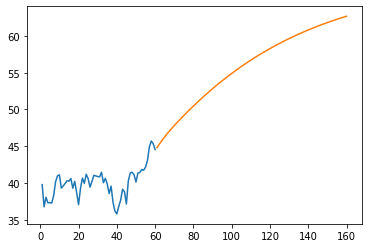

In [ ]:
plt.plot(dayT,scaler.inverse_transform(df1[1214:])) #1274 - 60 days (used for training (dayT)) = 1214 
plt.plot(dayPred,scaler.inverse_transform(output_lst)) #output after predicting 100 days (orange line)

Plot and combine the previous data (df1) and prediction of 100 days (output_lst) with display the data after 1200 observation.

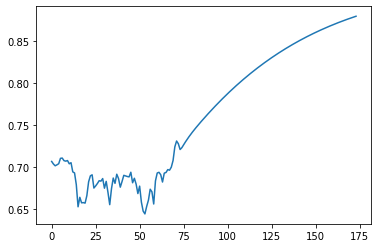

In [ ]:
dfPred=df1.tolist()
dfPred.extend(output_lst)
plt.plot(dfPred[1200:]) #display data after 1200 observations.

##Full diagram with the dataset and 100 days prediction of WTI crude oil

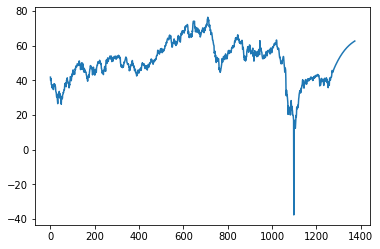

In [ ]:
dfPred= scaler.inverse_transform(dfPred).tolist() #transform back the dfPred to original form
plt.plot(dfPred) #plot the line graph of dfPred



#Conclusion and Future Works


The objective of this research is predict the price of WTI crude oil as crude oil is an commodity that could impact the currency like USD and other commodities pricing. In the study, it has been analyse the 5 year range of WTI crude oil price and predicting the next 100 days of the future price. To predict the oil price, the two LSTM model was developed with different hyperparameter and the model performance have been evaluated. RMSE and MSE have been utilised for the evaluation of the model performance and the predicting output was plotted with provide high accuracy and lower error. Model with additional hyperparameter provide a better result on the model train and validation loss with less epochs needed. 

However, the present work is limited on tuning the LSTM architecture. If the more computational resources are available, the more experiment can be run with more data to compare such as additional oil related stocks to indicate the correlation between the price of commodity and stock price with higher hyperparameter such as epochs, batch size etc. This could provide more clarity on hyperparameter tuning with better accuracy. Besides, the performance metrics such as AUC, MAPE for the measure the performance. Also, there might be a lot of indicators that could influence the trend of the stock in the financial time series such as moving average, stochastic and more, so selecting the proper indicator for the future prediction model could help reduce the dimension or reduce the parameter for training. It believed that the future work could be developed better with more functionable and provide higher accuracy on the prediction model.

#References
Binford, A., 2020. Predictive Early Stopping — A Meta Learning Approach. [online] Medium. Available at: <https://towardsdatascience.com/predictive-early-stopping-a-meta-learning-approach-90561f0e9454> [Accessed 9 January 2021].

Brownlee, J., 2019. Difference Between A Batch And An Epoch In A Neural Network. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/> [Accessed 9 January 2021].

Brownlee, J., 2019. Display Deep Learning Model Training History In Keras. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/> [Accessed 10 January 2021].

Chen, J., 2020. West Texas Intermediate (WTI). [online] Investopedia. Available at: <https://www.investopedia.com/terms/w/wti.asp> [Accessed 8 January 2021].

Keras., 2021. Train A Keras Model — Fit. [online] Keras.rstudio.com. Available at: <https://keras.rstudio.com/reference/fit.html> [Accessed 9 January 2021].

Kingma, D.P., Salimans, T., and Welling, M., 2015. Variational dropout and the local reparameterization trick. In Advances in neural information processing systems (pp. 2575–2583).

Malik, F., 2019. Why Should We Use Numpy?. [online] Medium. Available at: <https://medium.com/fintechexplained/why-should-we-use-numpy-c14a4fb03ee9> [Accessed 9 January 2021].

Matplotlib, 2021. Matplotlib: Python Plotting — Matplotlib 3.3.3 Documentation. [online] Matplotlib.org. Available at: <https://matplotlib.org/> [Accessed 9 January 2021].

Sayah, F., 2020. Stock Market Analysis + Prediction Using LSTM. [online] Kaggle.com. Available at: <https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm> [Accessed 10 January 2021].

Shah, T., 2017. About Train, Validation And Test Sets In Machine Learning. [online] Medium. Available at: <https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7> [Accessed 9 January 2021].

Wallance, C., 2020. WTI Crude Price Goes Negative For The First Time In History. [online] Worldoil.com. Available at: <https://www.worldoil.com/news/2020/4/20/wti-crude-price-goes-negative-for-the-first-time-in-history> [Accessed 9 January 2021].

Verma, S., 2019. Understanding Input And Output Shapes In LSTM | Keras. 
[online] Medium. Available at: < https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e> [Accessed 7 January 2021].

